In [37]:
import pandas as pd
import numpy as np

%store -r BZBE
%store -r BZGB
%store -r BZIE
%store -r BZNL
%store -r BZNO2NSL
%store -r BZFR
%store -r BZNO2

%store -r BZBEpc
%store -r BZGBpc
%store -r BZIEpc
%store -r BZNLpc
%store -r BZNO2pc
%store -r BZFRpc

In [38]:
Comp = pd.DataFrame({"GB": BZGB.iloc[:,1]})
Comp["BE"] = BZBE.iloc[:,1]
Comp["IE(SEM)"] = BZIE.iloc[:,1]
Comp["NL"] = BZNL.iloc[:,1]
Comp["NO2NSL"] = BZNO2NSL.iloc[:,1]
Comp["NO2"] = BZNO2.iloc[:,1]
Comp["FR"] = BZFR.iloc[:,1]

Comp["Date"] = pd.date_range(start="1/1/2021", periods=730, freq="D")

NewOrder = ["Date", "GB", "IE(SEM)", "NO2NSL", "NO2", "FR", "BE", "NL"]

Comp = Comp.reindex(columns=NewOrder)

print(Comp.to_string())

          Date      GB  IE(SEM)  NO2NSL     NO2      FR      BE      NL
0   2021-01-01    68.4    64.70     NaN   26.10   48.40   48.40   48.40
1   2021-01-02   71.54    77.96     NaN   26.85   50.56   50.56   50.56
2   2021-01-03   65.27    66.62     NaN   25.78   47.10   43.03   49.77
3   2021-01-04   67.32    70.48     NaN   41.61   59.27   46.74   49.72
4   2021-01-05    67.4    78.98     NaN   46.02   63.85   63.38   50.38
5   2021-01-06  160.07   129.20     NaN   41.06   70.16   81.45   50.59
6   2021-01-07  101.79    95.10     NaN   67.41   82.10   67.23   63.84
7   2021-01-08  115.46    90.25     NaN   76.62   84.85   82.17   72.77
8   2021-01-09   74.13    78.40     NaN   55.18   60.60   61.00   57.99
9   2021-01-10   76.47    72.93     NaN   42.02   56.85   60.64   49.96
10  2021-01-11   71.51    61.66     NaN   41.60   67.69   59.09   45.58
11  2021-01-12  126.26    94.09     NaN   44.83   63.54   61.51   51.07
12  2021-01-13   223.4   102.08     NaN   42.10   73.85   68.56 

          Date  GB Rolling  Mainland Rolling  GB and European Mainland Difference
0   2021-01-01         NaN               NaN                                  NaN
1   2021-01-02         NaN               NaN                                  NaN
2   2021-01-03         NaN               NaN                                  NaN
3   2021-01-04         NaN               NaN                                  NaN
4   2021-01-05         NaN               NaN                                  NaN
5   2021-01-06         NaN               NaN                                  NaN
6   2021-01-07         NaN               NaN                                  NaN
7   2021-01-08         NaN               NaN                                  NaN
8   2021-01-09         NaN               NaN                                  NaN
9   2021-01-10         NaN               NaN                                  NaN
10  2021-01-11         NaN               NaN                                  NaN
11  2021-01-12  

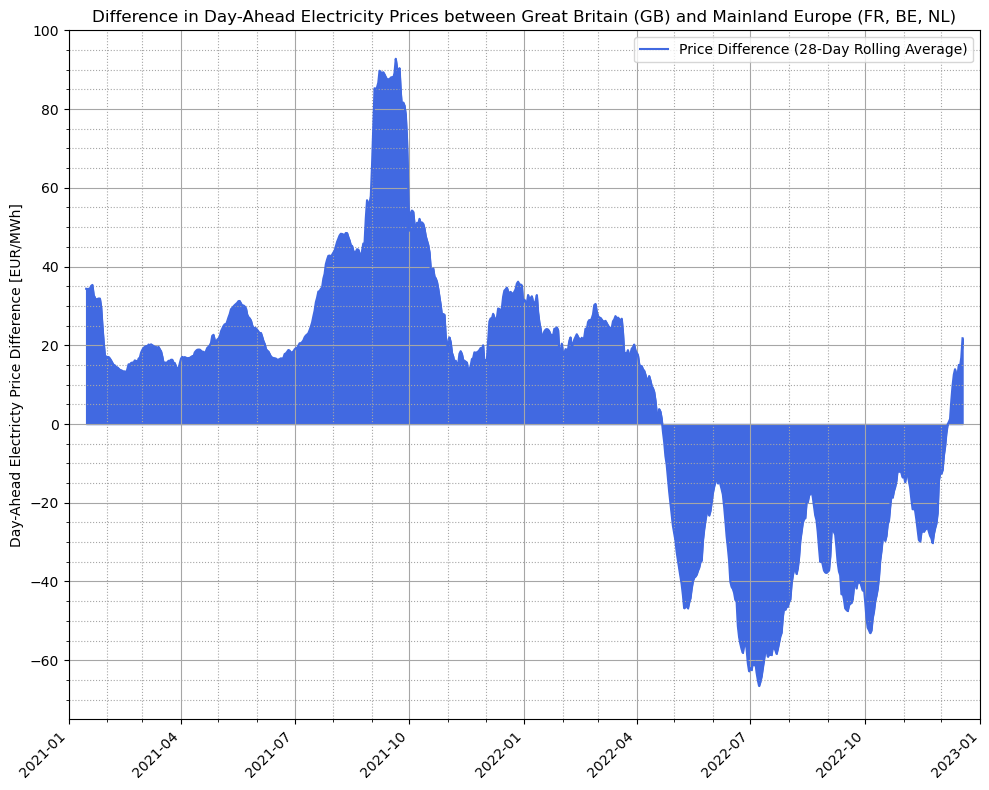

In [39]:
from matplotlib.ticker import MultipleLocator
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

AvgComp = pd.DataFrame({"Date": pd.date_range(start="1/1/2021", periods=730, freq="D")})

Mainland = pd.DataFrame({"FR, NL and BE": (BZFR.iloc[:,1] + BZNL.iloc[:,1] + BZBE.iloc[:,1])/3})

AvgComp['GB Rolling'] = Comp['GB'].rolling(28, center=True).mean()
AvgComp['Mainland Rolling'] = Mainland['FR, NL and BE'].rolling(28,  center=True).mean()
AvgComp['GB and European Mainland Difference'] = AvgComp['GB Rolling'] - AvgComp['Mainland Rolling']

print(AvgComp.head(730).to_string())

fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(10)

plt.title('Difference in Day-Ahead Electricity Prices between Great Britain (GB) and Mainland Europe (FR, BE, NL)')
plt.ylabel('Day-Ahead Electricty Price Difference [EUR/MWh]')

ax.plot(AvgComp["Date"], AvgComp["GB and European Mainland Difference"], color="royalblue", label="Price Difference (28-Day Rolling Average)")
plt.fill_between(AvgComp["Date"], AvgComp["GB and European Mainland Difference"], color="royalblue")


plt.legend()
plt.grid(visible=True, which='major', color='0.65', linestyle='-')
plt.grid(visible=True, which='minor', color='0.65', linestyle=':')

ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()

ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_minor_formatter(mdates.DateFormatter(""))

print(ax.get_xlim())
plt.xlim(18628, 19358)
plt.ylim(-75, 100)

plt.tick_params(axis='x', which='major', labelsize=10)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

          Date  FR, BE, NL
0   2021-01-01   48.400000
1   2021-01-02   50.560000
2   2021-01-03   46.633333
3   2021-01-04   51.910000
4   2021-01-05   59.203333
..         ...         ...
725 2022-12-27  122.840000
726 2022-12-28   57.893333
727 2022-12-29   43.396667
728 2022-12-30   17.210000
729 2022-12-31   10.090000

[730 rows x 2 columns]


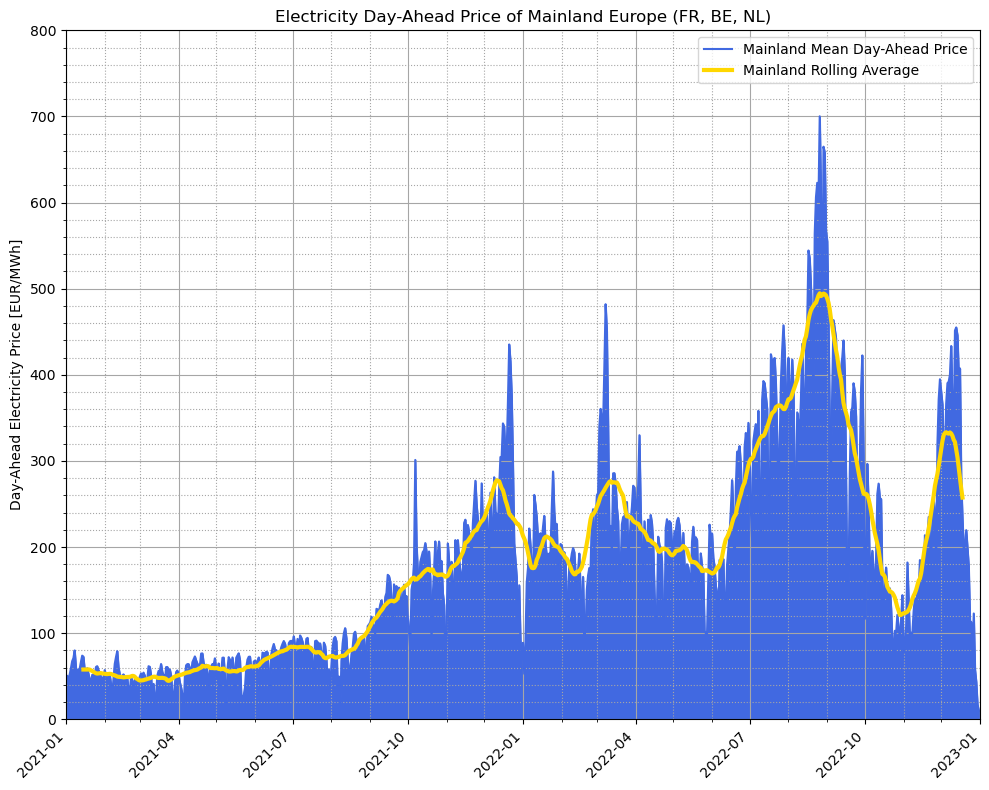

(18628.0, 19358.0)


In [43]:
from matplotlib.ticker import MultipleLocator
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

BZMainland = pd.DataFrame({"Date": pd.date_range(start="1/1/2021", periods=730, freq="D")})

BZMainland["FR, BE, NL"] = Mainland

print(BZMainland)

fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(10)

plt.title('Electricity Day-Ahead Price of Mainland Europe (FR, BE, NL)')
plt.ylabel('Day-Ahead Electricity Price [EUR/MWh]')

ax.plot(BZMainland["Date"], BZMainland["FR, BE, NL"], color = "royalblue", label="Mainland Mean Day-Ahead Price")
ax.plot(BZMainland["Date"], BZMainland["FR, BE, NL"].rolling(28,  center=True).mean(), linewidth=3, color = "gold", label="Mainland Rolling Average")
plt.fill_between(BZMainland["Date"], BZMainland["FR, BE, NL"].astype(float), color="royalblue")

plt.legend()
plt.grid(visible=True, which='major', color='0.65', linestyle='-')
plt.grid(visible=True, which='minor', color='0.65', linestyle=':')

#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

#n = 30
#ax.xaxis.set_minor_locator(plt.MultipleLocator(n-3))
#ax.xaxis.set_major_locator(plt.MultipleLocator(n))
ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()

#fig.autofmt_xdate()

plt.tick_params(axis='x', which='major', labelsize=10)
plt.xticks(rotation=45, ha='right')
plt.xlim(18628, 19358)
plt.ylim(0, 800)
plt.tight_layout()

ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_minor_formatter(mdates.DateFormatter(""))

plt.show()
print(ax.get_xlim())

(18591.55, 19393.45)


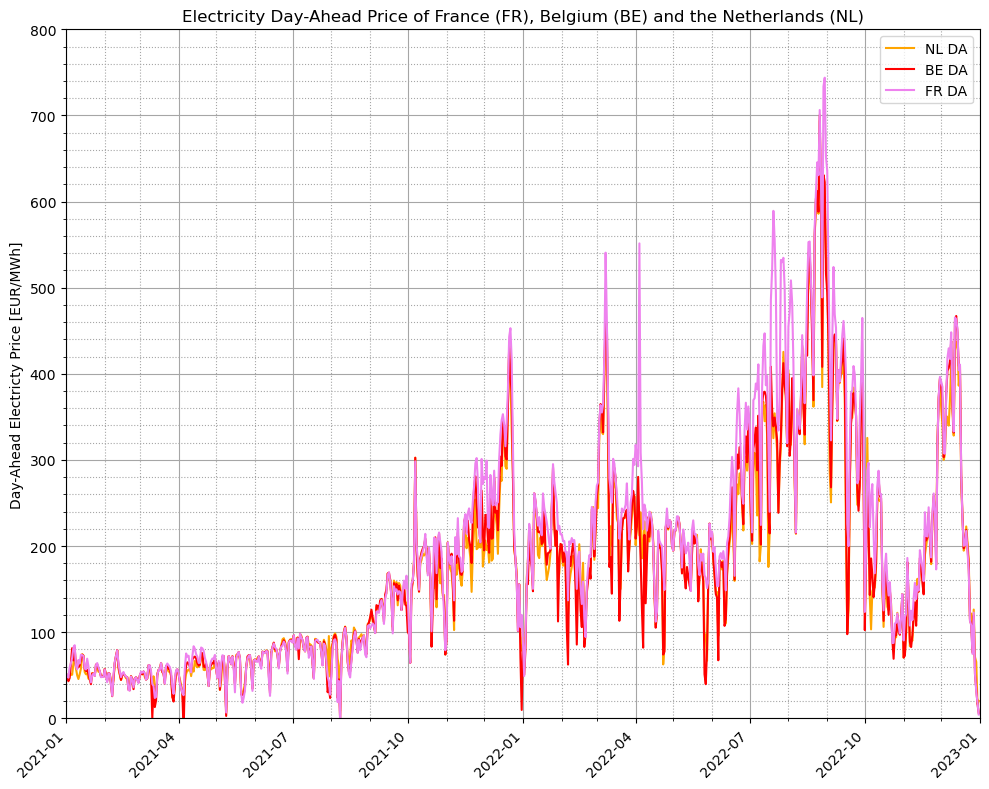

In [5]:
from matplotlib.ticker import MultipleLocator
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(10)



plt.title('Electricity Day-Ahead Price of France (FR), Belgium (BE) and the Netherlands (NL)')
plt.ylabel('Day-Ahead Electricty Price [EUR/MWh]')

ax.plot(Comp["Date"], Comp["NL"], color="orange", label="NL DA")
ax.plot(Comp["Date"], Comp["BE"], color="red", label="BE DA")
ax.plot(Comp["Date"], Comp["FR"], color="violet", label="FR DA")

plt.legend()
plt.grid(visible=True, which='major', color='0.65', linestyle='-')
plt.grid(visible=True, which='minor', color='0.65', linestyle=':')

ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()

fig.autofmt_xdate()

print(ax.get_xlim())

plt.tick_params(axis='x', which='major', labelsize=10)
plt.xticks(rotation=45, ha='right')
plt.xlim(18628, 19358)
plt.ylim(0, 800)
plt.tight_layout()

ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_minor_formatter(mdates.DateFormatter(""))

plt.show()

(18591.55, 19393.45)
(-29.021, 688.201)


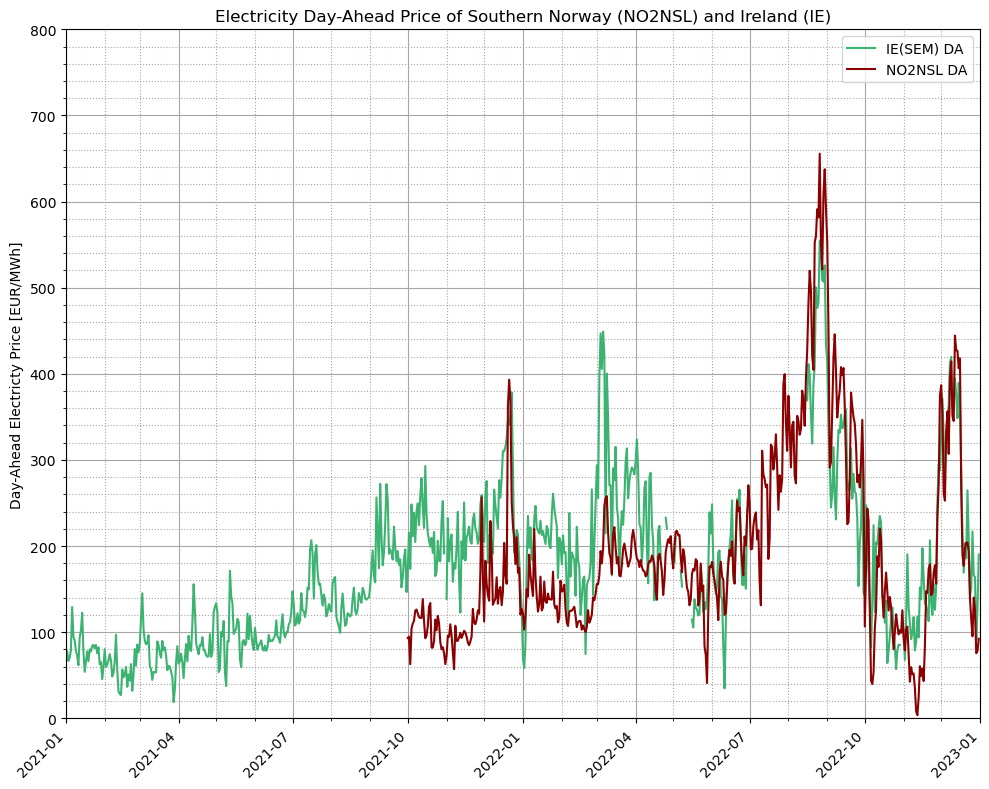

In [6]:
from matplotlib.ticker import MultipleLocator
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(10)

plt.title('Electricity Day-Ahead Price of Southern Norway (NO2NSL) and Ireland (IE)')
plt.ylabel('Day-Ahead Electricty Price [EUR/MWh]')

ax.plot(Comp["Date"], Comp["IE(SEM)"], color='mediumseagreen', label="IE(SEM) DA")
ax.plot(Comp["Date"], Comp["NO2NSL"], color='darkred', label="NO2NSL DA")

plt.legend()
plt.grid(visible=True, which='major', color='0.65', linestyle='-')
plt.grid(visible=True, which='minor', color='0.65', linestyle=':')

ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()

fig.autofmt_xdate()

print(ax.get_xlim())
print(ax.get_ylim())

plt.tick_params(axis='x', which='major', labelsize=10)
plt.xticks(rotation=45, ha='right')
plt.xlim(18628, 19358)
plt.ylim(0, 800)
plt.tight_layout()

ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_minor_formatter(mdates.DateFormatter(""))

plt.show()

          Date  GB Rolling  NO2 Rolling  GB and NO2 Difference
0   2021-01-01         NaN          NaN                    NaN
1   2021-01-02         NaN          NaN                    NaN
2   2021-01-03         NaN          NaN                    NaN
3   2021-01-04         NaN          NaN                    NaN
4   2021-01-05         NaN          NaN                    NaN
5   2021-01-06         NaN          NaN                    NaN
6   2021-01-07         NaN          NaN                    NaN
7   2021-01-08         NaN          NaN                    NaN
8   2021-01-09         NaN          NaN                    NaN
9   2021-01-10         NaN          NaN                    NaN
10  2021-01-11         NaN          NaN                    NaN
11  2021-01-12         NaN          NaN                    NaN
12  2021-01-13         NaN          NaN                    NaN
13  2021-01-14         NaN          NaN                    NaN
14  2021-01-15   92.125000    48.041786              44

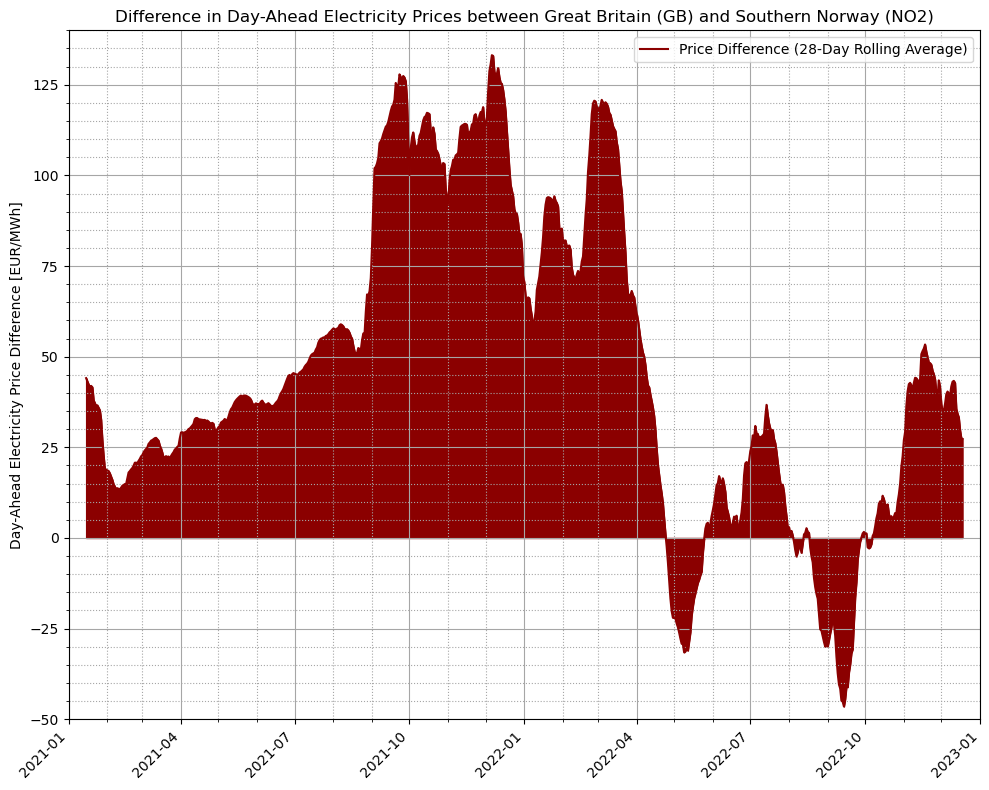

In [44]:
from matplotlib.ticker import MultipleLocator
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

AvgComp2 = pd.DataFrame({"Date": pd.date_range(start="1/1/2021", periods=730, freq="D")})

Scand = pd.DataFrame({"NO2NSL": BZNO2NSL.iloc[:,1],
                      "NO2": BZNO2.iloc[:,1]})

AvgComp2['GB Rolling'] = Comp['GB'].rolling(28, center=True).mean()
#AvgComp2['NO2NSL Rolling'] = Scand['NO2NSL'].rolling(28,  center=True).mean()
AvgComp2['NO2 Rolling'] = Scand['NO2'].rolling(28,  center=True).mean()
AvgComp2['GB and NO2 Difference'] = AvgComp2['GB Rolling'] - AvgComp2['NO2 Rolling']

print(AvgComp2.head(730).to_string())

fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(10)

plt.title('Difference in Day-Ahead Electricity Prices between Great Britain (GB) and Southern Norway (NO2)')
plt.ylabel('Day-Ahead Electricity Price Difference [EUR/MWh]')

ax.plot(AvgComp2["Date"], AvgComp2["GB and NO2 Difference"], color="darkred", label="Price Difference (28-Day Rolling Average)")
plt.fill_between(AvgComp2["Date"], AvgComp2["GB and NO2 Difference"], color="darkred")


plt.legend()
plt.grid(visible=True, which='major', color='0.65', linestyle='-')
plt.grid(visible=True, which='minor', color='0.65', linestyle=':')

ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()

ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_minor_formatter(mdates.DateFormatter(""))

print(ax.get_xlim())

plt.xlim(18628, 19358)
plt.ylim(-50, 140)

plt.tick_params(axis='x', which='major', labelsize=10)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

          Date  GB Rolling  IE(SEM) Rolling  GB and IE(SEM) Difference
0   2021-01-01         NaN              NaN                        NaN
1   2021-01-02         NaN              NaN                        NaN
2   2021-01-03         NaN              NaN                        NaN
3   2021-01-04         NaN              NaN                        NaN
4   2021-01-05         NaN              NaN                        NaN
5   2021-01-06         NaN              NaN                        NaN
6   2021-01-07         NaN              NaN                        NaN
7   2021-01-08         NaN              NaN                        NaN
8   2021-01-09         NaN              NaN                        NaN
9   2021-01-10         NaN              NaN                        NaN
10  2021-01-11         NaN              NaN                        NaN
11  2021-01-12         NaN              NaN                        NaN
12  2021-01-13         NaN              NaN                        NaN
13  20

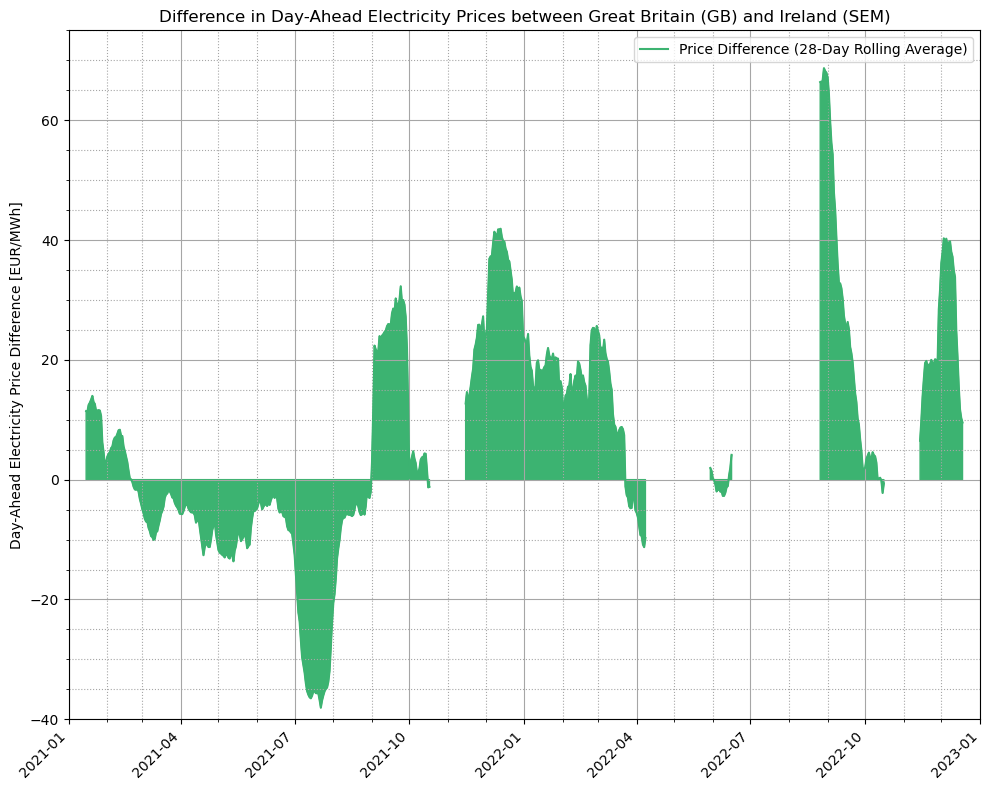

In [45]:
from matplotlib.ticker import MultipleLocator
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

AvgComp3 = pd.DataFrame({"Date": pd.date_range(start="1/1/2021", periods=730, freq="D")})

Scand = pd.DataFrame({"IE(SEM)": BZIE.iloc[:,1]})

AvgComp3['GB Rolling'] = Comp['GB'].rolling(28, center=True).mean()
AvgComp3['IE(SEM) Rolling'] = Scand['IE(SEM)'].rolling(28,  center=True).mean()
AvgComp3['GB and IE(SEM) Difference'] = AvgComp3['GB Rolling'] - AvgComp3['IE(SEM) Rolling']

print(AvgComp3.head(730).to_string())

fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(10)

plt.title('Difference in Day-Ahead Electricity Prices between Great Britain (GB) and Ireland (SEM)')
plt.ylabel('Day-Ahead Electricity Price Difference [EUR/MWh]')

ax.plot(AvgComp3["Date"], AvgComp3["GB and IE(SEM) Difference"], color="mediumseagreen", label="Price Difference (28-Day Rolling Average)")
plt.fill_between(AvgComp3["Date"], AvgComp3["GB and IE(SEM) Difference"], color="mediumseagreen")


plt.legend()
plt.grid(visible=True, which='major', color='0.65', linestyle='-')
plt.grid(visible=True, which='minor', color='0.65', linestyle=':')

ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()

ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_minor_formatter(mdates.DateFormatter(""))

print(ax.get_xlim())

plt.xlim(18628, 19358)
plt.ylim(-40, 75)

plt.tick_params(axis='x', which='major', labelsize=10)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

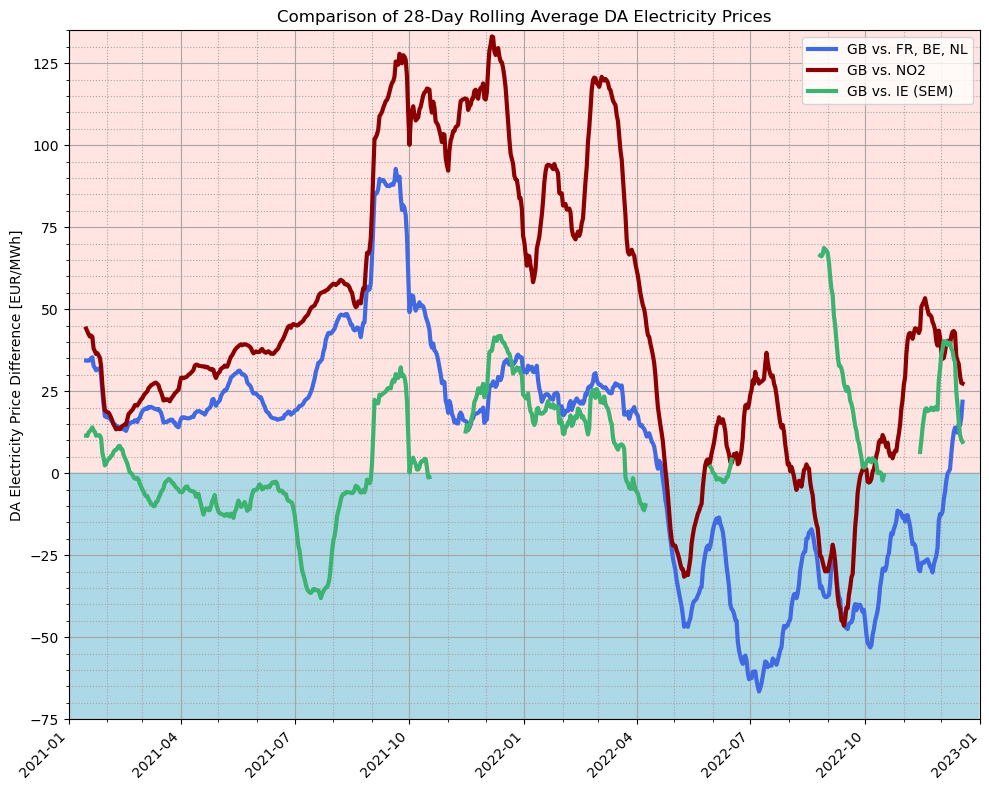

In [46]:
from matplotlib.ticker import MultipleLocator
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(10)

plt.title('Comparison of 28-Day Rolling Average DA Electricity Prices')
plt.ylabel('DA Electricity Price Difference [EUR/MWh]')

plt.fill_between(AvgComp["Date"], 100000000, color = "mistyrose")
plt.fill_between(AvgComp["Date"], -100000000, color = "lightblue")

ax.plot(AvgComp["Date"], AvgComp["GB and European Mainland Difference"], color="royalblue", linewidth=3, label="GB vs. FR, BE, NL")
ax.plot(AvgComp2["Date"], AvgComp2["GB and NO2 Difference"], color="darkred", linewidth=3, label="GB vs. NO2")
ax.plot(AvgComp3["Date"], AvgComp3["GB and IE(SEM) Difference"], color="mediumseagreen", linewidth=3, label="GB vs. IE (SEM)")


plt.legend()
plt.grid(visible=True, which='major', color='0.65', linestyle='-')
plt.grid(visible=True, which='minor', color='0.65', linestyle=':')

ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()

ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_minor_formatter(mdates.DateFormatter(""))

plt.xlim(18628, 19358)
plt.ylim(-75, 135)

plt.tick_params(axis='x', which='major', labelsize=10)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

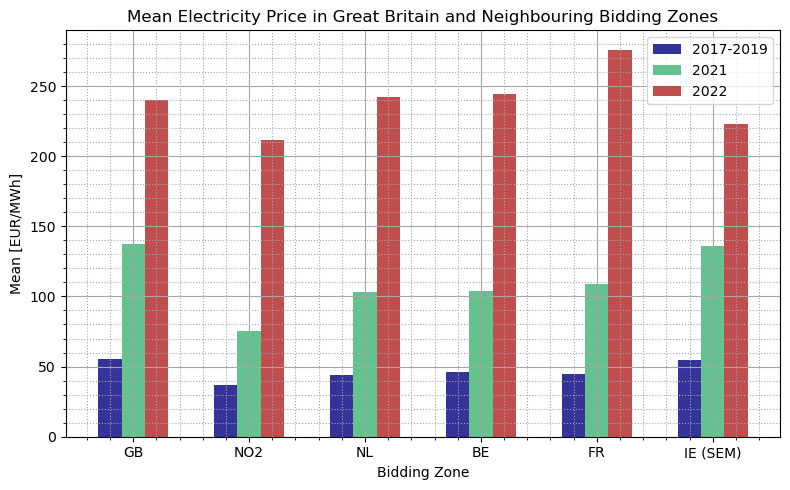

In [33]:
MNGBpc = np.mean(BZGBpc.iloc[:,1].astype(float))
MNNO2pc = np.mean(BZNO2pc.iloc[:,1].astype(float))
MNNLpc = np.mean(BZNLpc.iloc[:,1].astype(float))
MNBEpc = np.mean(BZBEpc.iloc[:,1].astype(float))
MNFRpc = np.mean(BZFRpc.iloc[:,1].astype(float))
MNIEpc = np.mean(BZIEpc.iloc[:,1].astype(float))

MNGB2021 = np.mean(BZGB.iloc[:365,1].astype(float))
MNNO22021 = np.mean(BZNO2.iloc[:365,1].astype(float))
MNNL2021 = np.mean(BZNL.iloc[:365,1].astype(float))
MNBE2021 = np.mean(BZBE.iloc[:365,1].astype(float))
MNFR2021 = np.mean(BZFR.iloc[:365,1].astype(float))
MNIE2021 = np.mean(BZIE.iloc[:365,1].astype(float))

MNGB2022 = np.mean(BZGB.iloc[365:,1].astype(float))
MNNO22022 = np.mean(BZNO2.iloc[365:,1].astype(float))
MNNL2022 = np.mean(BZNL.iloc[365:,1].astype(float))
MNBE2022 = np.mean(BZBE.iloc[365:,1].astype(float))
MNFR2022 = np.mean(BZFR.iloc[365:,1].astype(float))
MNIE2022 = np.mean(BZIE.iloc[365:,1].astype(float))

n_BZN = 6
MNpc = (MNGBpc, MNNO2pc, MNNLpc, MNBEpc, MNFRpc, MNIEpc)
MN2021 = (MNGB2021, MNNO22021, MNNL2021, MNBE2021, MNFR2021, MNIE2021)
MN2022 = (MNGB2022, MNNO22022, MNNL2022, MNBE2022, MNFR2022, MNIE2022)

# create plot
fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(8)

index = np.arange(n_BZN)
bar_width = 0.2
opacity = 0.8

rects1 = plt.bar(index - bar_width, MNpc, bar_width,
alpha=opacity,
color='navy',
label='2017-2019')

rects2 = plt.bar(index, MN2021, bar_width,
alpha=opacity,
color='mediumseagreen',
label='2021')

rects3 = plt.bar(index + bar_width, MN2022, bar_width,
alpha=opacity,
color='firebrick',
label='2022')

plt.xlabel('Bidding Zone')
plt.ylabel('Mean [EUR/MWh]')
plt.title('Mean Electricity Price in Great Britain and Neighbouring Bidding Zones')
plt.xticks(index, ('GB', 'NO2', 'NL', 'BE', 'FR', 'IE (SEM)'))
plt.legend()

plt.grid(visible=True, which='major', color='0.65', linestyle='-')
plt.grid(visible=True, which='minor', color='0.65', linestyle=':')

ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()

plt.tight_layout()
plt.show()

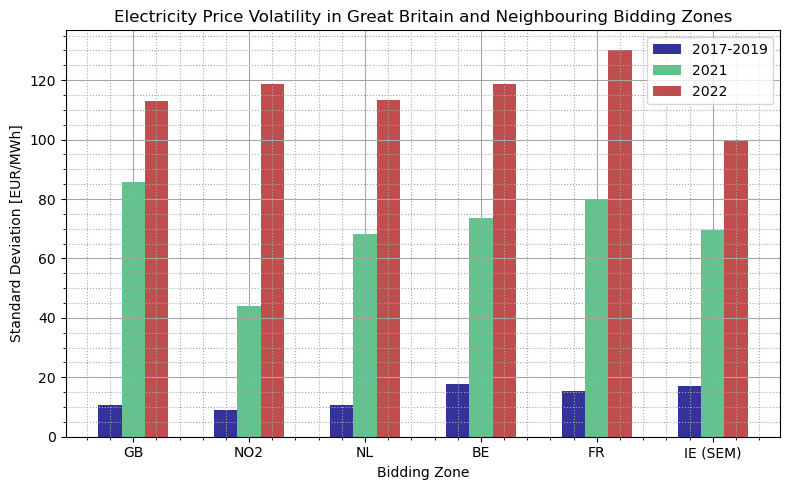

In [32]:
STDGBpc = np.std(BZGBpc.iloc[:,1].astype(float))
STDNO2pc = np.std(BZNO2pc.iloc[:,1].astype(float))
STDNLpc = np.std(BZNLpc.iloc[:,1].astype(float))
STDBEpc = np.std(BZBEpc.iloc[:,1].astype(float))
STDFRpc = np.std(BZFRpc.iloc[:,1].astype(float))
STDIEpc = np.std(BZIEpc.iloc[:,1].astype(float))

STDGB2021 = np.std(BZGB.iloc[:365,1].astype(float))
STDNO22021 = np.std(BZNO2.iloc[:365,1].astype(float))
STDNL2021 = np.std(BZNL.iloc[:365,1].astype(float))
STDBE2021 = np.std(BZBE.iloc[:365,1].astype(float))
STDFR2021 = np.std(BZFR.iloc[:365,1].astype(float))
STDIE2021 = np.std(BZIE.iloc[:365,1].astype(float))

STDGB2022 = np.std(BZGB.iloc[365:,1].astype(float))
STDNO22022 = np.std(BZNO2.iloc[365:,1].astype(float))
STDNL2022 = np.std(BZNL.iloc[365:,1].astype(float))
STDBE2022 = np.std(BZBE.iloc[365:,1].astype(float))
STDFR2022 = np.std(BZFR.iloc[365:,1].astype(float))
STDIE2022 = np.std(BZIE.iloc[365:,1].astype(float))

# data to plot
n_BZN = 6
STDpc = (STDGBpc, STDNO2pc, STDNLpc, STDBEpc, STDFRpc, STDIEpc)
STD2021 = (STDGB2021, STDNO22021, STDNL2021, STDBE2021, STDFR2021, STDIE2021)
STD2022 = (STDGB2022, STDNO22022, STDNL2022, STDBE2022, STDFR2022, STDIE2022)

# create plot
fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(8)

index = np.arange(n_BZN)
bar_width = 0.2
opacity = 0.8

rects1 = plt.bar(index - bar_width, STDpc, bar_width,
alpha=opacity,
color='navy',
label='2017-2019')

rects2 = plt.bar(index, STD2021, bar_width,
alpha=opacity,
color='mediumseagreen',
label='2021')

rects3 = plt.bar(index + bar_width, STD2022, bar_width,
alpha=opacity,
color='firebrick',
label='2022')

plt.xlabel('Bidding Zone')
plt.ylabel('Standard Deviation [EUR/MWh]')
plt.title('Electricity Price Volatility in Great Britain and Neighbouring Bidding Zones')
plt.xticks(index, ('GB', 'NO2', 'NL', 'BE', 'FR', 'IE (SEM)'))
plt.legend()

plt.grid(visible=True, which='major', color='0.65', linestyle='-')
plt.grid(visible=True, which='minor', color='0.65', linestyle=':')

ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()

plt.tight_layout()
plt.show()